In [1]:
import tensorflow as tf
import os, zipfile

url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=url, extract=False)

extract_path = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

train_dir = os.path.join(extract_path, 'train')
val_dir = os.path.join(extract_path, 'validation')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 405ms/step - accuracy: 0.4975 - loss: 0.8070 - val_accuracy: 0.5020 - val_loss: 0.6931
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 412ms/step - accuracy: 0.5070 - loss: 0.6928 - val_accuracy: 0.5120 - val_loss: 0.6939
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 396ms/step - accuracy: 0.5315 - loss: 0.6937 - val_accuracy: 0.5650 - val_loss: 0.6833
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 398ms/step - accuracy: 0.5415 - loss: 0.6902 - val_accuracy: 0.5550 - val_loss: 0.6876
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 397ms/step - accuracy: 0.5270 - loss: 0.6910 - val_accuracy: 0.5650 - val_loss: 0.6896
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 403ms/step - accuracy: 0.5360 - loss: 0.6907 - val_accuracy: 0.5010 - val_loss: 0.6925
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 401ms/step - accuracy: 0.5005 - loss: 0.6921 - val_accuracy: 0.5740 - val_loss: 0.6879
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 394ms/step - accuracy: 0.5520 - loss: 0.6896 - val_accu

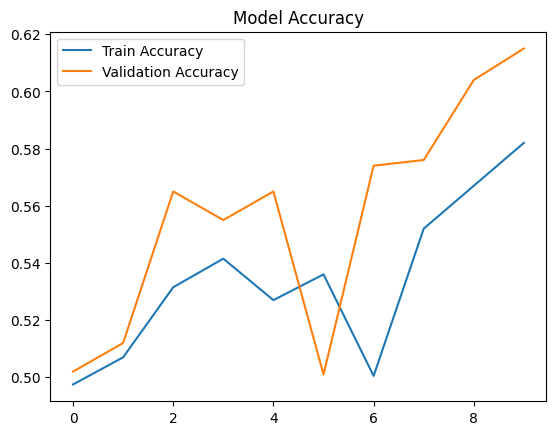

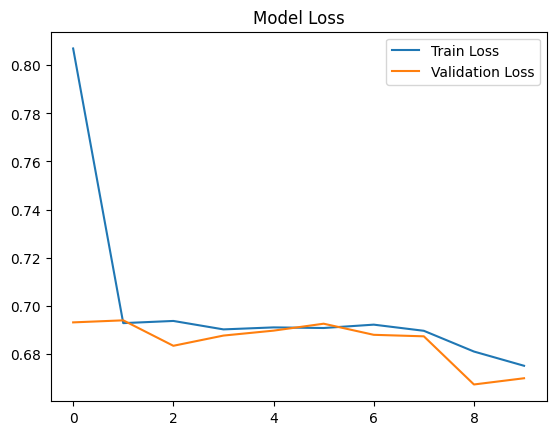

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


model.save("cat_dog_classifier.keras")


from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        print(f"Prediction: 🐶 Dog ({prediction[0][0]:.2f})")
    else:
        print(f"Prediction: 🐱 Cat ({1 - prediction[0][0]:.2f})")


In [9]:
import pathlib
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Use a known directory in your project folder
base_dir = pathlib.Path(os.getcwd()) / "cats_and_dogs_filtered"

# If not present, download & extract
if not base_dir.exists():
    dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
    zip_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=dataset_url, extract=True)
    base_dir = pathlib.Path(zip_path).with_suffix('').parent / "cats_and_dogs_filtered"

train_dir = base_dir / "train"
validation_dir = base_dir / "validation"

# Check folders
print(f"Train exists? {train_dir.exists()}, Validation exists? {validation_dir.exists()}")
print(f"Subfolders in validation: {[p.name for p in validation_dir.iterdir() if p.is_dir()]}")

# Validation generator
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Train exists? True, Validation exists? True
Subfolders in validation: ['cats', 'dogs']
Found 1000 images belonging to 2 classes.


In [10]:


import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

model = tf.keras.models.load_model("cat_dog_classifier.keras")

val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.2f}")

# Confusion matrix
Y_pred = model.predict(val_generator)
y_pred = (Y_pred > 0.5).astype("int32")
print(confusion_matrix(val_generator.classes, y_pred))
print(classification_report(val_generator.classes, y_pred, target_names=["Cat", "Dog"]))


C:\Users\ROG\img_classifier\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.6150 - loss: 0.6698
Validation Accuracy: 0.62
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step
[[251 249]
 [136 364]]
              precision    recall  f1-score   support

         Cat       0.65      0.50      0.57       500
         Dog       0.59      0.73      0.65       500

    accuracy                           0.61      1000
   macro avg       0.62      0.61      0.61      1000
weighted avg       0.62      0.61      0.61      1000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


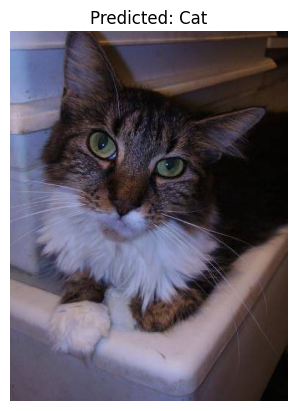

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random, os
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model("cat_dog_classifier.keras")

test_img = random.choice(os.listdir(validation_dir / "cats"))
img_path = validation_dir / "cats" / test_img

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0][0]
label = "Dog" if prediction > 0.5 else "Cat"

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {label}")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


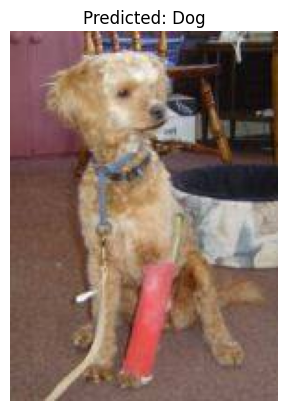

Actual: Dogs, Predicted: Dog, Confidence: 0.59


In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.preprocessing import image
import pathlib

# 1️⃣ Load model
model = tf.keras.models.load_model("cat_dog_classifier.keras")

# 2️⃣ Use dataset inside your project folder
# Change this to the folder where you actually extracted the zip
base_dir = pathlib.Path(os.getcwd()) / "cats_and_dogs_filtered"
validation_dir = base_dir / "validation"

# 3️⃣ Pick a random image
class_folder = random.choice(["cats", "dogs"])
img_folder = validation_dir / class_folder
test_img_name = random.choice(os.listdir(img_folder))
img_path = img_folder / test_img_name

# 4️⃣ Load and preprocess image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# 5️⃣ Predict
prediction = model.predict(img_array)[0][0]
pred_label = "Dog" if prediction > 0.5 else "Cat"

# 6️⃣ Display
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {pred_label}")
plt.axis("off")
plt.show()

print(f"Actual: {class_folder.capitalize()}, Predicted: {pred_label}, Confidence: {prediction:.2f}")
